In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from scipy import stats
%matplotlib inline

### Load features

Load the description of the features from the provided file `columns.txt`.

In [110]:
features = {}
for line in open('columns.txt'):
    key, value = line.split(":")
    features[key] = value.replace("\n","")
    print("{}:{}".format(key,value))
print("Total features: {}".format(len(features)))

MSSubClass: clase de construcción

MSZoning: clasificación de la zona

LotFrontage: pies lineales de calle de la parcela

LotArea: tamaño de la parcela en pies cuadrados

Street: tipo de acceso por carretera

Alley: tipo de acceso al callejón

LotShape: forma de la parcela

LandContour: planitud de la parcela

Utilities: servicios públicos disponibles

LotConfig: Configuración de parcela

LandSlope: pendiente de la parcela

Neighborhood: ubicación física dentro de los límites de la ciudad de Ames

Condition1: proximidad a la carretera principal o al ferrocarril

Condition2: proximidad a la carretera principal o al ferrocarril (si hay un segundo)

BldgType: tipo de vivienda

HouseStyle: estilo de vivienda

OverallQual: calidad general del material y del acabado

OverallCond: condición general

YearBuilt: fecha original de construcción

YearRemodAdd: fecha de remodelación

RoofStyle: tipo de cubierta

RoofMatl: material del techo

Exterior1st: revestimiento exterior de la casa

Exterior2

### Load the dataset

In [111]:
trainData = pd.read_csv('housing_train.csv')
trainData = trainData.drop_duplicates() # We ensure there are not duplicated values
shape = trainData.shape
print("loaded {} records. There are {} features.".format(shape[0],shape[1]))

loaded 1460 records. There are 81 features.


### Explore numeric variables

In [112]:
numeric_vars = ['YearBuilt','LotFrontage','LotArea',
 'YearRemodAdd','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF','GrLivArea',
 'MasVnrArea','BsmtHalfBath','BsmtFullBath', 'FullBath', 'HalfBath', 
 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd','Fireplaces', 'GarageYrBlt', 
 'GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF', 
 'EnclosedPorch','3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'SalePrice'
]
numeric_vars.sort()

combo_num = widgets.Dropdown(
    options= numeric_vars,
    description='Var:',
)

def display_numeric_var_stats(variable_name):
    all_values = trainData[variable_name]
    values = all_values[all_values>0]
    variable_stats = stats.describe(values)
    print("Description  : {}".format(features[variable_name]))
    print("Total records: {}".format(variable_stats.nobs))
    print("Zero records : {}".format(len(all_values)-len(values)))
    print("Nan records  : {}".format(all_values.isnull().values.sum()))
    print("Min value    : {}".format(values.min()))
    print("Max value    : {}".format(values.max()))
    print("Average      : {}".format(np.average(values)))
    print("Median       : {}".format(np.nanmedian(values)))
    print("Mean         : {}".format(np.nanmean(values)))
    print("Variance     : {}".format(variable_stats.variance))
    print("Skewness     : {}".format(variable_stats.skewness))
    print("Kurtosis     : {}".format(variable_stats.kurtosis))
    print("Percentile10 : {}".format(np.percentile(values, .1))) 
    print("Percentile25 : {}".format(np.percentile(values, .25))) 
    print("Percentile50 : {}".format(np.percentile(values, .50))) 
    print("Percentile75 : {}".format(np.percentile(values, .75))) 
    print("Percentile100: {}".format(np.percentile(values, 1))) 

def on_change_num(change):
    if change['type'] == 'change' and change['name'] == 'value':
        with out_num:
            variable = change['new']
            out_num.clear_output()
            display_numeric_var_stats(variable)
        
out_num = widgets.Output(layout = widgets.Layout(height='350px'))
combo_num.observe(on_change_num)
display(combo_num)
display(out_num)


Dropdown(description='Var:', options=('1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'Bsmt…

Output(layout=Layout(height='350px'))

### Explore categorical variables

In [113]:
%matplotlib inline

categorical_vars = [
    'MSSubClass', 'MSZoning', 'Street','Alley','LotShape','LandContour',
    'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
    'BldgType','HouseStyle', 'OverallQual','OverallCond','RoofStyle',
    'RoofMatl', 'Exterior1st', 'Exterior2nd','MasVnrType', 
    'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC','CentralAir', 
    'Electrical', 'KitchenQual','Functional', 'FireplaceQu','GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
    'PoolQC', 'Fence', 'MiscFeature', 'MoSold','YrSold','SaleType','SaleCondition'
]
categorical_vars.sort()

w = widgets.Dropdown(
    options= categorical_vars,
    value=categorical_vars[0],
    description='Var:',
)


def display_pie(column):
    data = trainData[column].value_counts()
    labels = data.index.tolist()
    plt.pie(data,labels=labels, autopct='%1.0f%%')
    p=plt.gcf()
    plt.title(features[column])
    plt.legend(labels, loc="best")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

def on_change_cat(change):
    if change['type'] == 'change' and change['name'] == 'value':
        with out_cat:
            variable = change['new']
            out_cat.clear_output()
            display_pie(variable)
        

out_cat = widgets.Output(layout = widgets.Layout(height='350px'))
w.observe(on_change_cat)
display(w)
display(out_cat)

Dropdown(description='Var:', options=('Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFi…

Output(layout=Layout(height='350px'))

### Hypotesis & Normalization

- We can remove useless feature `Ìd`.
- There are only 7 records for numeric variable `PoolArea`. We will drop this category and create a new categorical variable.  The name of this new feature will be `hasPool` and its categories `yes` or `no`. 
- `YearBuilt`, `YearRemodAdd` don't make sense at all. They could be converted to.. `BuiltAgo` and `RemodAddAgo`, and their values will be recalculated. 

In [114]:
for column in trainData.columns:
    totalNa = trainData[column].isna().sum()
    if totalNa > 0:
        print("{} has {}".format(column,totalNa))
    if totalNa > len(trainData)*0.3:
        trainData.drop([column],axis='columns', inplace=True)
        if column in numeric_vars:
            numeric_vars.remove(column)
        else:
            categorical_vars.remove(column)



for i, j in trainData.iterrows():
    count_nan  = trainData.loc[[i]].isna().sum().sum()
    if count_nan > 5:
        trainData = trainData.drop([i],axis="rows")
        


print(trainData.shape)    

LotFrontage has 259
Alley has 1369
MasVnrType has 8
MasVnrArea has 8
BsmtQual has 37
BsmtCond has 37
BsmtExposure has 38
BsmtFinType1 has 37
BsmtFinType2 has 38
Electrical has 1
FireplaceQu has 690
GarageType has 81
GarageYrBlt has 81
GarageFinish has 81
GarageQual has 81
GarageCond has 81
PoolQC has 1453
Fence has 1179
MiscFeature has 1406
(1440, 76)


In [115]:
print(trainData.shape)
trainData.drop(['Id'], axis='columns', inplace=True)
print(trainData.shape)
trainData['HasPool'] = trainData.apply (lambda row: 'yes' if row.PoolArea>0 else 'no', axis=1)
print(trainData.shape)
trainData.drop(['PoolArea'],axis='columns', inplace=True)
print(trainData.shape)

trainData['BuiltAgo'] = trainData.apply (lambda row: row.YrSold - row.YearBuilt, axis=1)
trainData['RemodAddAgo'] = trainData.apply (lambda row: (row.YrSold - row.YearRemodAdd) if row.YearRemodAdd else (row.YrSold - row.YearBuilt), axis=1)
trainData.drop(['YearBuilt','YearRemodAdd'],axis='columns', inplace=True)
print(trainData.shape)

for feature in ['PoolArea','YearBuilt','YearRemodAdd']:
    if feature in numeric_vars:
        numeric_vars.remove(feature)
for feature in ['BuiltAgo','RemodAddAgo']:
    if feature not in numeric_vars:
        numeric_vars.append(feature)
for feature in ['HasPool']:
    if feature not in categorical_vars:
        categorical_vars.append(feature)
numeric_vars.sort()
categorical_vars.sort()

(1440, 76)
(1440, 75)
(1440, 76)
(1440, 75)
(1440, 75)


In [52]:
trainData.head()  

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasPool,BuiltAgo,RemodAddAgo
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,no,5,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,no,31,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,no,7,6
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,no,91,36
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,no,8,8


### Sale price by variables

In [116]:
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots

all_vars =numeric_vars + categorical_vars
all_vars.sort()

combo_all_variables = widgets.Dropdown(
    options=all_vars,
    description='Var:',
)
plt.tight_layout()
def on_change_variable(change):
    if change['type'] == 'change' and change['name'] == 'value':
        with out_price:
            variable_name = change['new']
            out_price.clear_output()
            fig,axes = plt.subplots(ncols=2)
            fig.set_size_inches(20, 8)
            sns.barplot(x=variable_name, y='SalePrice', data=trainData, ax=axes[0])
            axes[0].set(title='Sales Price by {}'.format(variable_name))
            axes[0].tick_params(axis='x', labelrotation=90)

            sns.boxplot(x=variable_name, y='SalePrice', data=trainData, ax=axes[1])
            axes[1].set(title='Box Plot On Sales Price Across {}'.format(variable_name))
            show_inline_matplotlib_plots()

        
out_price = widgets.Output(layout = widgets.Layout(height='700px'))
combo_all_variables.observe(on_change_variable)
display(combo_all_variables)
display(out_price)

Dropdown(description='Var:', options=('1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType', 'BsmtCo…

Output(layout=Layout(height='700px'))

<Figure size 432x288 with 0 Axes>

### Correlation matrix

[Text(0.5, 0, '1stFlrSF'),
 Text(1.5, 0, '2ndFlrSF'),
 Text(2.5, 0, '3SsnPorch'),
 Text(3.5, 0, 'BedroomAbvGr'),
 Text(4.5, 0, 'BsmtFinSF1'),
 Text(5.5, 0, 'BsmtFinSF2'),
 Text(6.5, 0, 'BsmtFullBath'),
 Text(7.5, 0, 'BsmtHalfBath'),
 Text(8.5, 0, 'BsmtUnfSF'),
 Text(9.5, 0, 'BuiltAgo'),
 Text(10.5, 0, 'EnclosedPorch'),
 Text(11.5, 0, 'Fireplaces'),
 Text(12.5, 0, 'FullBath'),
 Text(13.5, 0, 'GarageArea'),
 Text(14.5, 0, 'GarageCars'),
 Text(15.5, 0, 'GarageYrBlt'),
 Text(16.5, 0, 'GrLivArea'),
 Text(17.5, 0, 'HalfBath'),
 Text(18.5, 0, 'KitchenAbvGr'),
 Text(19.5, 0, 'LotArea'),
 Text(20.5, 0, 'LotFrontage'),
 Text(21.5, 0, 'LowQualFinSF'),
 Text(22.5, 0, 'MasVnrArea'),
 Text(23.5, 0, 'MiscVal'),
 Text(24.5, 0, 'OpenPorchSF'),
 Text(25.5, 0, 'RemodAddAgo'),
 Text(26.5, 0, 'SalePrice'),
 Text(27.5, 0, 'ScreenPorch'),
 Text(28.5, 0, 'TotRmsAbvGrd'),
 Text(29.5, 0, 'TotalBsmtSF'),
 Text(30.5, 0, 'WoodDeckSF')]

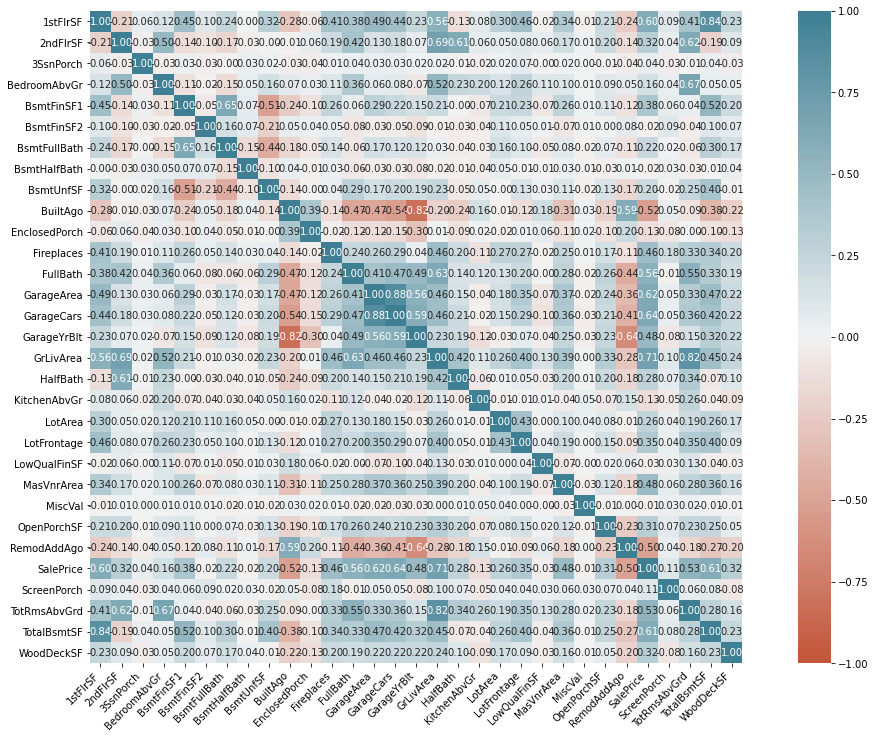

In [117]:
df = trainData[numeric_vars]

corr = df.corr(method='pearson')



# HeatMap con tamaño ampliado, cuadrado, divergencia con colores y con anotaciones de 2 decimales
plt.figure(figsize=(20,12))
ax = sns.heatmap(
 corr,
 vmin=-1, vmax=1, center=0,
 cmap=sns.diverging_palette(20, 220, n=200),
 square=True, annot=True, fmt=".2f"
)
# Rota las etiquetas del eje horizontal
ax.set_xticklabels(
 ax.get_xticklabels(),
 rotation=45,
 horizontalalignment='right'
)

In [119]:
#for col in ['1stFlrSF', 'GarageArea', 'TotRmsAbvGrd','GarageYrBlt']: 
#    numeric_vars.remove(col)
            
df = trainData[numeric_vars]

corr = df.corr(method='pearson')

for row in numeric_vars:
    for col in numeric_vars:
        if abs(corr[row][col])>0.7 and row is not col:
            print("correlation between {} and {}  is {}",row, col, corr[row][col])
print(df.shape)

correlation between {} and {}  is {} 1stFlrSF TotalBsmtSF 0.8373984087214312
correlation between {} and {}  is {} BuiltAgo GarageYrBlt -0.8245583706584705
correlation between {} and {}  is {} GarageArea GarageCars 0.8763913136336124
correlation between {} and {}  is {} GarageCars GarageArea 0.8763913136336124
correlation between {} and {}  is {} GarageYrBlt BuiltAgo -0.8245583706584705
correlation between {} and {}  is {} GrLivArea SalePrice 0.7067172819604313
correlation between {} and {}  is {} GrLivArea TotRmsAbvGrd 0.8248769023393345
correlation between {} and {}  is {} SalePrice GrLivArea 0.7067172819604313
correlation between {} and {}  is {} TotRmsAbvGrd GrLivArea 0.8248769023393345
correlation between {} and {}  is {} TotalBsmtSF 1stFlrSF 0.8373984087214312
(1440, 31)


In [120]:
for c in ['1stFlrSF','GarageYrBlt','GarageArea']:
    trainData.drop(c,axis=1,inplace=True)
    if c in categorical_vars:
        categorical_vars.remove(c)
    else:
        numeric_vars.remove(c)


In [121]:
# Para numericals



# Para categoricals

print()
print()
factor = trainData['LotArea'].describe()['mean'] / trainData['LotFrontage'].describe()['mean']
print(factor)
trainData['LotFrontage'].fillna( trainData['LotArea']/factor, inplace = True)

for columnName in categorical_vars:
    na_value = trainData[trainData[columnName].isna()]
    if len(na_value)>0:
        trainData[columnName].fillna( 'Unknown', inplace = True)

trainData = trainData[trainData['MasVnrArea'].notna()]



150.42243241197724


### One-Hot Encoding

In [125]:

trainData2 =  trainData
new_numeric_vars = numeric_vars
for column in categorical_vars:
    for value in trainData2[column].unique():
        new_numeric_var = "{}_{}".format(column,value)
        trainData2[new_numeric_var] = trainData2.apply (lambda row: 1 if value==row[column] else 0, axis=1)
    trainData2.drop([column],axis='columns', inplace=True)


In [15]:


corr = trainData2.corr(method='pearson')



# HeatMap con tamaño ampliado, cuadrado, divergencia con colores y con anotaciones de 2 decimales
plt.figure(figsize=(20,12))
ax = sns.heatmap(
 corr,
 vmin=-1, vmax=1, center=0,
 cmap=sns.diverging_palette(20, 220, n=200),
 square=True, annot=True, fmt=".2f"
)
# Rota las etiquetas del eje horizontal
ax.set_xticklabels(
 ax.get_xticklabels(),
 rotation=45,
 horizontalalignment='right'
)

[Text(0.5, 0, 'LotFrontage'),
 Text(4.5, 0, 'BsmtFinSF2'),
 Text(8.5, 0, 'LowQualFinSF'),
 Text(12.5, 0, 'FullBath'),
 Text(16.5, 0, 'TotRmsAbvGrd'),
 Text(20.5, 0, 'OpenPorchSF'),
 Text(24.5, 0, 'MiscVal'),
 Text(28.5, 0, 'BldgType_1Fam'),
 Text(32.5, 0, 'BldgType_Twnhs'),
 Text(36.5, 0, 'BsmtCond_Fa'),
 Text(40.5, 0, 'BsmtExposure_Mn'),
 Text(44.5, 0, 'BsmtFinType1_ALQ'),
 Text(48.5, 0, 'BsmtFinType1_Unknown'),
 Text(52.5, 0, 'BsmtFinType2_Unknown'),
 Text(56.5, 0, 'BsmtFinType2_GLQ'),
 Text(60.5, 0, 'BsmtQual_Unknown'),
 Text(64.5, 0, 'Condition1_Norm'),
 Text(68.5, 0, 'Condition1_RRAe'),
 Text(72.5, 0, 'Condition1_RRNe'),
 Text(76.5, 0, 'Condition2_Feedr'),
 Text(80.5, 0, 'Condition2_RRAe'),
 Text(84.5, 0, 'Electrical_FuseP'),
 Text(88.5, 0, 'ExterCond_Gd'),
 Text(92.5, 0, 'ExterQual_Gd'),
 Text(96.5, 0, 'Exterior1st_VinylSd'),
 Text(100.5, 0, 'Exterior1st_BrkFace'),
 Text(104.5, 0, 'Exterior1st_Stucco'),
 Text(108.5, 0, 'Exterior1st_ImStucc'),
 Text(112.5, 0, 'Exterior2nd_Wd Shng'

Error in callback <function flush_figures at 0x12bc41af0> (for post_execute):


KeyboardInterrupt: 

## Decission Tree

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

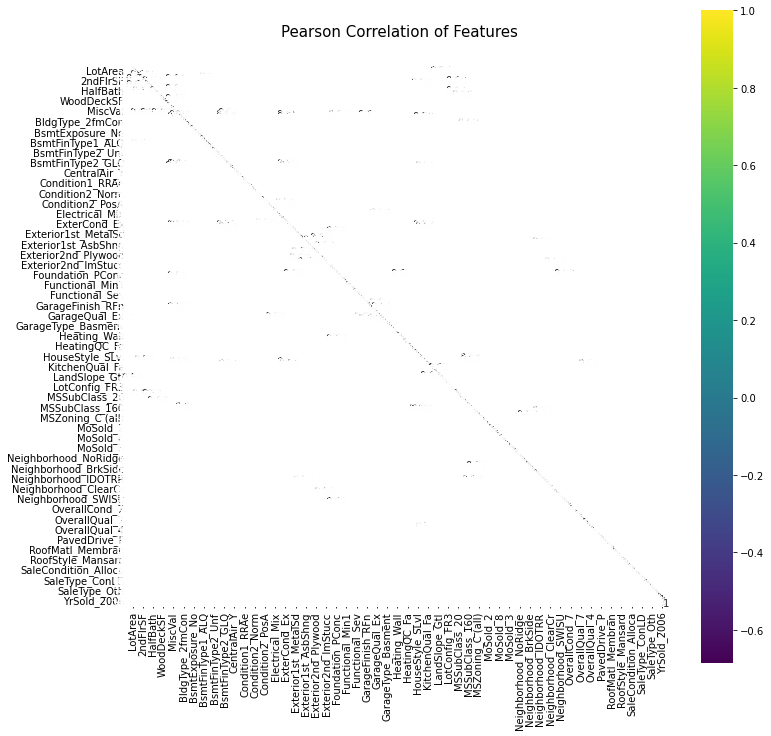

In [154]:
original_train = trainData.copy() 

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(trainData.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)


In [124]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation 

#split dataset in features and target variable
feature_cols = trainData.columns

X = trainData[feature_cols] # Features
y = trainData.SalePrice # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

ValueError: could not convert string to float: 'RL'

In [152]:
"""
corrmat = trainData2.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.1]
plt.figure(figsize=(10,10))
g = sns.heatmap(trainData2[top_corr_features].corr(),annot=True,cmap="RdYlGn")
"""
features= trainData2.columns

corr = trainData2.corr(method='pearson')

cols_to_be_removed = []
for row in features:
    for col in features:
        if abs(corr[row][col])>0.7 and row is not col:
            print("correlation between {} and {}  is {}",row, col, corr[row][col])
            if abs(corr[row]['SalePrice'])> abs(corr[col]['SalePrice']):
                print("elimina {}".format(col))
                cols_to_be_removed.append(col)
            else:
                print("elimina {}".format(row))
                cols_to_be_removed.append(row)
trainData2.drop(cols_to_be_removed,axis='columns', inplace=True)
print(trainData2.shape)

(1432, 263)


In [100]:
print(trainData2.shape)

(1432, 264)


Accuracy: 0.4558139534883721


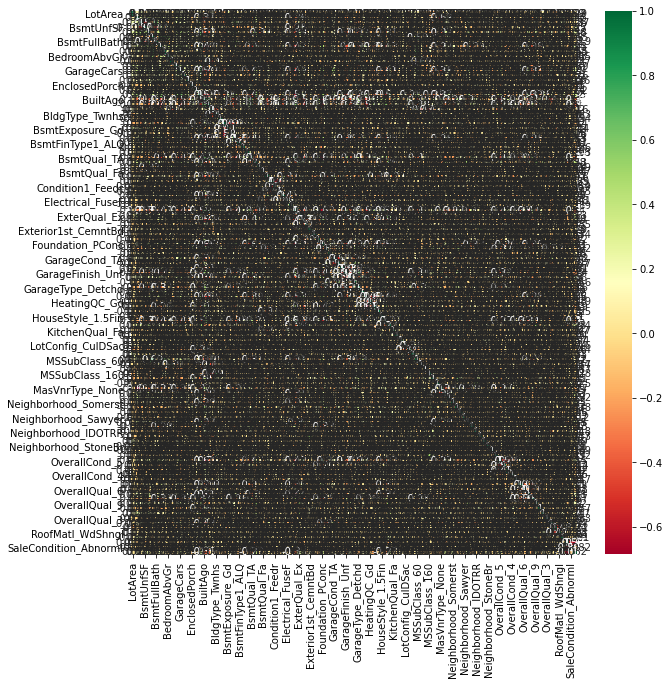

In [153]:
corrmat = trainData2.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.1]
plt.figure(figsize=(10,10))
g = sns.heatmap(trainData2[top_corr_features].corr(),annot=True,cmap="RdYlGn")


# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation 

#split dataset in features and target variable
feature_cols = top_corr_features

X = trainData2[feature_cols] # Features
y = trainData2.SalePrice # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
rom sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[trainDa.feature_names], df['target'], random_state=0)

In [ ]:
from scipy import stats
from scipy.stats import norm

In [ ]:
sns.distplot(trainData['SalePrice'] , fit=norm)

(mu, sigma) = norm.fit(trainData['SalePrice'])

print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')


plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(trainData['SalePrice'], plot=plt)
plt.show()